In [1]:
import pandas as pd
import numpy as np

biobert_euadr = pd.read_csv("/home/016651544/model_predictions_files/biobert_with_FT_predictions_euadr.tsv",sep="\t")
biobert_euadr.columns = ["sentence", "actual_output",	"predicted_output"]
biobert_euadr["actual_output"] =  biobert_euadr['actual_output'] == 1
biobert_euadr["predicted_output"] =  biobert_euadr['predicted_output'] == 1
gemma_2b_euadr = pd.read_csv("/home/016651544/model_predictions_files/gemma_2b_euadr_predictions.csv")
gemma_7b_euadr = pd.read_csv("/home/016651544/model_predictions_files/gemma_7b_euadr_predictions.csv")
llama_7b_euadr = pd.read_csv("/home/016651544/model_predictions_files/llama2_7b_euadr_predictions.csv")


In [2]:
display(biobert_euadr.head())
display(gemma_2b_euadr.head())
display(gemma_7b_euadr.head())
display(llama_7b_euadr.head())

,sentence,actual_output,predicted_output
0,Our work supported @GENE$ genetic variants as ...,True,True
1,"Especially, the SNP @GENE$ and its strongly as...",True,True
2,"Especially, the SNP rs491347 and its strongly ...",True,True
3,The HBS1L-MYB intergenic region on chromosome ...,False,True
4,Fetal haemoglobin (@GENE$) level modifies the ...,True,True


,sentence,actual_output,predicted_output
0,Our work supported @GENE$ genetic variants as ...,True,True
1,"Especially, the SNP @GENE$ and its strongly as...",True,True
2,"Especially, the SNP rs491347 and its strongly ...",True,True
3,The HBS1L-MYB intergenic region on chromosome ...,False,False
4,Fetal haemoglobin (@GENE$) level modifies the ...,True,True


,sentence,actual_output,predicted_output
0,Our work supported @GENE$ genetic variants as ...,True,True
1,"Especially, the SNP @GENE$ and its strongly as...",True,True
2,"Especially, the SNP rs491347 and its strongly ...",True,True
3,The HBS1L-MYB intergenic region on chromosome ...,False,False
4,Fetal haemoglobin (@GENE$) level modifies the ...,True,False


,sentence,actual_output,predicted_output
0,Our work supported @GENE$ genetic variants as ...,True,True
1,"Especially, the SNP @GENE$ and its strongly as...",True,True
2,"Especially, the SNP rs491347 and its strongly ...",True,True
3,The HBS1L-MYB intergenic region on chromosome ...,False,False
4,Fetal haemoglobin (@GENE$) level modifies the ...,True,True


### BioBERT vs Llama2-7b

In [3]:
# Step 2: Merge the DataFrames
merged_df = biobert_euadr.merge(llama_7b_euadr, on=['sentence','actual_output'], suffixes=('_biobert', '_llama2'))
# Step 2: Identify where BioBERT failed but Llama2 succeeded
merged_df['biobert_correct'] = merged_df['predicted_output_biobert'] == merged_df['actual_output']
merged_df['llama2_correct'] = merged_df['predicted_output_llama2'] == merged_df['actual_output']

# Filter for discrepancies: BioBERT incorrect, Llama2 correct
errors = merged_df[(merged_df['biobert_correct'] == False) & (merged_df['llama2_correct'] == True)]

# Display the sentences with discrepancies
print("Discrepancies where BioBERT failed but Llama2-7b succeeded:")
errors[['sentence', 'predicted_output_biobert', 'predicted_output_llama2', 'actual_output']]


Discrepancies where BioBERT failed but Llama2-7b succeeded:


,sentence,predicted_output_biobert,predicted_output_llama2,actual_output
3,The HBS1L-MYB intergenic region on chromosome ...,True,False,False
6,The @GENE$ intergenic region on chromosome 6q2...,True,False,False
7,The HBS1L-MYB intergenic region on chromosome ...,True,False,False
8,Functional studies to unravel the biological s...,True,False,False
10,On the other hand the frequency of @GENE$ geno...,True,False,False
...,...,...,...,...
325,The results obtained in this study suggest tha...,True,False,False
326,Women carrying homozygous Asp1104Asp genotypes...,True,False,False
329,Women carrying homozygous Asp1104Asp genotypes...,True,False,False
346,"Additionally, levels of @GENE$ were significan...",True,False,False


/tmp/ipykernel_160844/1362880932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['cleaned_sentence'] = errors['sentence'].apply(


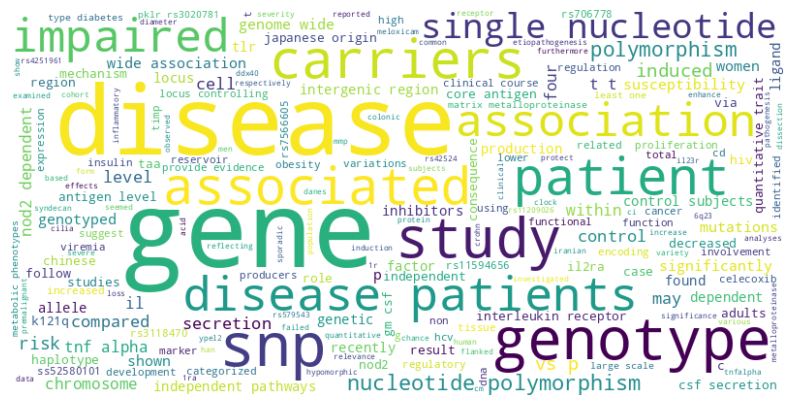

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Clean the sentences by removing specific unwanted words
unwanted_words = ["@GENE$" , "@DISEASE$","gene", "disease"]
errors['cleaned_sentence'] = errors['sentence'].apply(
    lambda x: ' '.join(word for word in x.strip().lower().split() if word not in unwanted_words)
)

# Join all cleaned sentences
text = ' '.join(errors['cleaned_sentence'])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [5]:
word_freq = wordcloud.words_

# Print word frequencies
print("Word Frequencies:")
count = 0
for word, freq in word_freq.items():
    print(f"{word}: {freq}")
    count+=1
    if count >25:
        break

Word Frequencies:
gene: 1.0
disease: 0.8020833333333334
snp: 0.19791666666666666
genotype: 0.1875
study: 0.16666666666666666
carriers: 0.15625
associated: 0.14583333333333334
patient: 0.14583333333333334
disease patients: 0.14583333333333334
association: 0.13541666666666666
impaired: 0.13541666666666666
single nucleotide: 0.13541666666666666
nucleotide polymorphism: 0.13541666666666666
polymorphism: 0.125
induced: 0.10416666666666667
vs p: 0.10416666666666667
risk: 0.09375
level: 0.08333333333333333
may: 0.08333333333333333
control: 0.08333333333333333
compared: 0.08333333333333333
cell: 0.08333333333333333
secretion: 0.08333333333333333
chromosome: 0.07291666666666667
il: 0.07291666666666667
four: 0.07291666666666667


### BioBERT vs Gemma-7b

In [6]:
# Step 2: Merge the DataFrames
merged_df = biobert_euadr.merge(gemma_7b_euadr, on=['sentence','actual_output'], suffixes=('_biobert', '_gemma7b'))
# Step 2: Identify where BioBERT failed but Llama2 succeeded
merged_df['biobert_correct'] = merged_df['predicted_output_biobert'] == merged_df['actual_output']
merged_df['gemma7b_correct'] = merged_df['predicted_output_gemma7b'] == merged_df['actual_output']

# Filter for discrepancies: BioBERT incorrect, Llama2 correct
errors = merged_df[(merged_df['biobert_correct'] == False) & (merged_df['gemma7b_correct'] == True)]

# Display the sentences with discrepancies
print("Discrepancies where BioBERT failed but Gemma-7b succeeded:")
errors[['sentence', 'predicted_output_biobert', 'predicted_output_gemma7b', 'actual_output']]


Discrepancies where BioBERT failed but Gemma-7b succeeded:


,sentence,predicted_output_biobert,predicted_output_gemma7b,actual_output
3,The HBS1L-MYB intergenic region on chromosome ...,True,False,False
6,The @GENE$ intergenic region on chromosome 6q2...,True,False,False
7,The HBS1L-MYB intergenic region on chromosome ...,True,False,False
10,On the other hand the frequency of @GENE$ geno...,True,False,False
18,"However, the majority of @DISEASE$ cells have ...",True,False,False
...,...,...,...,...
263,Compound heterozygosity for the @GENE$ and A12...,True,False,False
321,We genotyped the four single-nucleotide polymo...,True,False,False
325,The results obtained in this study suggest tha...,True,False,False
326,Women carrying homozygous Asp1104Asp genotypes...,True,False,False


/tmp/ipykernel_160844/1362880932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['cleaned_sentence'] = errors['sentence'].apply(


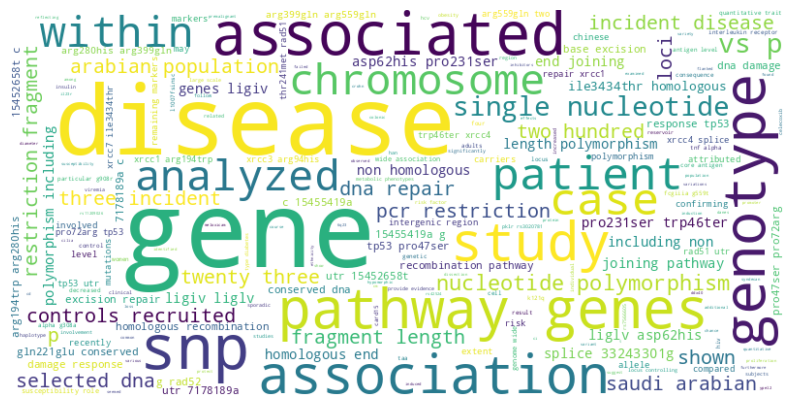

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Clean the sentences by removing specific unwanted words
unwanted_words = ["@GENE$" , "@DISEASE$","gene", "disease"]
errors['cleaned_sentence'] = errors['sentence'].apply(
    lambda x: ' '.join(word for word in x.strip().lower().split() if word not in unwanted_words)
)

# Join all cleaned sentences
text = ' '.join(errors['cleaned_sentence'])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
word_freq = wordcloud.words_

# Print word frequencies
print("Word Frequencies:")
count = 0
for word, freq in word_freq.items():
    print(f"{word}: {freq}")
    count+=1
    if count >25:
        break

Word Frequencies:
gene: 1.0
disease: 0.7916666666666666
snp: 0.20833333333333334
associated: 0.19444444444444445
genotype: 0.18055555555555555
pathway genes: 0.16666666666666666
study: 0.1527777777777778
association: 0.1527777777777778
patient: 0.1111111111111111
case: 0.1111111111111111
chromosome: 0.09722222222222222
within: 0.09722222222222222
analyzed: 0.09722222222222222
single nucleotide: 0.09722222222222222
vs p: 0.09722222222222222
nucleotide polymorphism: 0.09722222222222222
p: 0.08333333333333333
loci: 0.08333333333333333
shown: 0.08333333333333333
two hundred: 0.08333333333333333
twenty three: 0.08333333333333333
three incident: 0.08333333333333333
incident disease: 0.08333333333333333
controls recruited: 0.08333333333333333
saudi arabian: 0.08333333333333333
arabian population: 0.08333333333333333


### Gemma-7b vs Llama2

In [9]:
# Step 2: Merge the DataFrames
merged_df = llama_7b_euadr.merge(gemma_7b_euadr, on=['sentence','actual_output'], suffixes=('_llama7b', '_gemma7b'))
# Step 2: Identify where BioBERT failed but Llama2 succeeded
merged_df['llama7b_correct'] = merged_df['predicted_output_llama7b'] == merged_df['actual_output']
merged_df['gemma7b_correct'] = merged_df['predicted_output_gemma7b'] == merged_df['actual_output']

# Filter for discrepancies: BioBERT incorrect, Llama2 correct
errors = merged_df[(merged_df['gemma7b_correct'] == False) & (merged_df['llama7b_correct'] == True)]

# Display the sentences with discrepancies
print("Discrepancies where Gemma-7b failed but Llama2 succeeded:")
errors[['sentence', 'predicted_output_llama7b', 'predicted_output_gemma7b', 'actual_output']]


Discrepancies where Gemma-7b failed but Llama2 succeeded:


,sentence,predicted_output_llama7b,predicted_output_gemma7b,actual_output
4,Fetal haemoglobin (@GENE$) level modifies the ...,True,False,True
5,@GENE$ (HbF) level modifies the clinical sever...,True,False,True
8,Functional studies to unravel the biological s...,False,True,False
12,"@GENE$, IL-1R and TNFalpha gene polymorphisms ...",True,False,True
13,Overall and relapse-free survival in @DISEASE$...,True,False,True
...,...,...,...,...
343,@GENE$ mRNA was expressed in 100% of the contr...,True,False,True
346,"Additionally, levels of @GENE$ were significan...",False,True,False
348,Failure of medical and surgical therapy in @DI...,True,False,True
351,The @GENE$ polymorphism (Thr256Ser) is associa...,True,False,True


/tmp/ipykernel_160844/1362880932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['cleaned_sentence'] = errors['sentence'].apply(


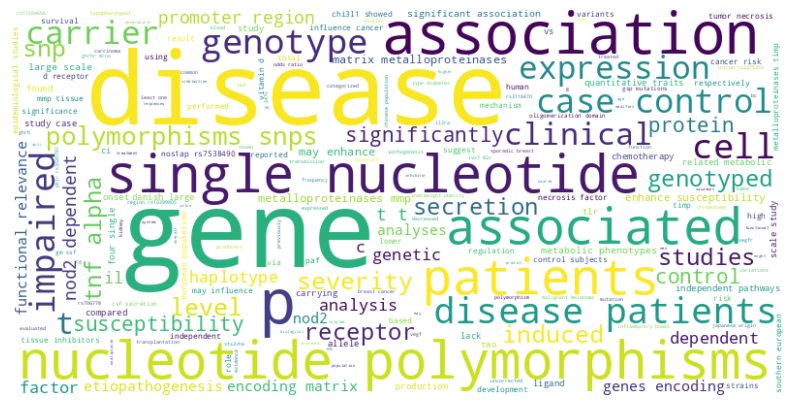

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Clean the sentences by removing specific unwanted words
unwanted_words = ["@GENE$" , "@DISEASE$","gene", "disease"]
errors['cleaned_sentence'] = errors['sentence'].apply(
    lambda x: ' '.join(word for word in x.strip().lower().split() if word not in unwanted_words)
)

# Join all cleaned sentences
text = ' '.join(errors['cleaned_sentence'])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [11]:
word_freq = wordcloud.words_

# Print word frequencies
print("Word Frequencies:")
count = 0
for word, freq in word_freq.items():
    print(f"{word}: {freq}")
    count+=1
    if count >25:
        break

Word Frequencies:
gene: 1.0
disease: 0.8861788617886179
p: 0.18699186991869918
association: 0.16260162601626016
single nucleotide: 0.13821138211382114
nucleotide polymorphisms: 0.13821138211382114
patients: 0.12195121951219512
associated: 0.12195121951219512
disease patients: 0.12195121951219512
cell: 0.11382113821138211
genotype: 0.11382113821138211
impaired: 0.10569105691056911
case control: 0.0975609756097561
expression: 0.08943089430894309
carrier: 0.08943089430894309
clinical: 0.08130081300813008
t: 0.08130081300813008
polymorphisms snps: 0.08130081300813008
level: 0.07317073170731707
severity: 0.07317073170731707
snp: 0.07317073170731707
induced: 0.07317073170731707
studies: 0.06504065040650407
genotyped: 0.06504065040650407
receptor: 0.06504065040650407
secretion: 0.06504065040650407


### GAD data

In [12]:
biobert_gad = pd.read_csv("/home/016651544/model_predictions_files/biobert_with_FT_predictions_gad.tsv",sep="\t")
biobert_gad.columns = ["sentence", "actual_output",	"predicted_output"]
# biobert_gad[["actual_output",	"predicted_output"]] = biobert_gad[["actual_output",	"predicted_output"]].astype(bool)
biobert_gad["actual_output"] =  biobert_gad['actual_output'] == 1
biobert_gad["predicted_output"] =  biobert_gad['predicted_output'] == 1
gemma_2b_gad = pd.read_csv("/home/016651544/model_predictions_files/gemma_2b_gad_predictions.csv")
gemma_7b_gad = pd.read_csv("/home/016651544/model_predictions_files/gemma_7b_gad_predictions.csv")
llama_7b_gad = pd.read_csv("/home/016651544/model_predictions_files/llama2_7b_gad_predictions.csv")

### BioBERT vs Llama2-7b

In [13]:
# Step 2: Merge the DataFrames
merged_df = biobert_gad.merge(llama_7b_gad, on=['sentence','actual_output'], suffixes=('_biobert', '_llama2'))
# Step 2: Identify where BioBERT failed but Llama2 succeeded
merged_df['biobert_correct'] = merged_df['predicted_output_biobert'] == merged_df['actual_output']
merged_df['llama2_correct'] = merged_df['predicted_output_llama2'] == merged_df['actual_output']

# Filter for discrepancies: BioBERT incorrect, Llama2 correct
errors = merged_df[(merged_df['biobert_correct'] == False) & (merged_df['llama2_correct'] == True)]

# Display the sentences with discrepancies
print("Discrepancies where BioBERT failed but Llama2-7b succeeded:")
errors[['sentence', 'predicted_output_biobert', 'predicted_output_llama2', 'actual_output']]


Discrepancies where BioBERT failed but Llama2-7b succeeded:


,sentence,predicted_output_biobert,predicted_output_llama2,actual_output
1,"In our setting, @DISEASE$ among alcoholic indi...",False,True,True
2,MPO genotype GG is associated with @DISEASE$ i...,False,True,True
43,These data suggest that polymorphisms in the @...,False,True,True
69,Determination of VNTR of the @GENE$ gene may p...,False,True,True
90,"Taken together, these results demonstrate that...",False,True,True
...,...,...,...,...
5767,"@GENE$ contributes little, if at all, to the d...",True,False,False
5772,The study did not show that the C242T polymorp...,True,False,False
5774,Our result showed no association between the C...,True,False,False
5781,Our study suggests a potential role of the @GE...,True,False,False


/tmp/ipykernel_160844/1362880932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['cleaned_sentence'] = errors['sentence'].apply(


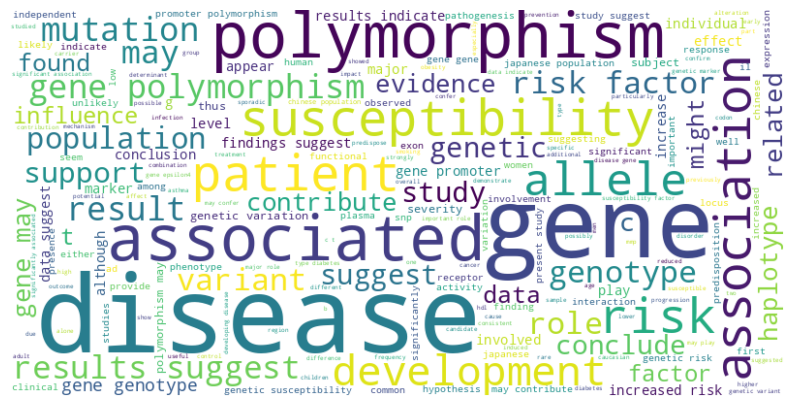

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Clean the sentences by removing specific unwanted words
unwanted_words = ["@GENE$" , "@DISEASE$","gene", "disease"]
errors['cleaned_sentence'] = errors['sentence'].apply(
    lambda x: ' '.join(word for word in x.strip().lower().split() if word not in unwanted_words)
)

# Join all cleaned sentences
text = ' '.join(errors['cleaned_sentence'])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
word_freq = wordcloud.words_

# Print word frequencies
print("Word Frequencies:")
count = 0
for word, freq in word_freq.items():
    print(f"{word}: {freq}")
    count+=1
    if count >25:
        break

Word Frequencies:
disease: 1.0
gene: 0.8091993185689949
associated: 0.24872231686541738
polymorphism: 0.24701873935264054
association: 0.14310051107325383
susceptibility: 0.141396933560477
patient: 0.13884156729131175
risk: 0.1354344122657581
allele: 0.12095400340715502
development: 0.09880749574105621
gene polymorphism: 0.09625212947189098
mutation: 0.09454855195911414
result: 0.0919931856899489
may: 0.08773424190800681
results suggest: 0.08773424190800681
role: 0.08432708688245315
variant: 0.08262350936967632
genotype: 0.08091993185689948
risk factor: 0.07921635434412266
population: 0.075809199318569
support: 0.06984667802385008
suggest: 0.065587734241908
genetic: 0.06388415672913117
study: 0.062180579216354344
conclude: 0.056218057921635436
c: 0.05366269165247019


### BioBERT vs Gemma-7b

In [18]:
# Step 2: Merge the DataFrames
merged_df = biobert_gad.merge(gemma_7b_gad, on=['sentence','actual_output'], suffixes=('_biobert', '_gemma7b'))
# Step 2: Identify where BioBERT failed but Llama2 succeeded
merged_df['biobert_correct'] = merged_df['predicted_output_biobert'] == merged_df['actual_output']
merged_df['gemma7b_correct'] = merged_df['predicted_output_gemma7b'] == merged_df['actual_output']

# Filter for discrepancies: BioBERT incorrect, Llama2 correct
errors = merged_df[(merged_df['biobert_correct'] == False) & (merged_df['gemma7b_correct'] == True)]

# Display the sentences with discrepancies
print("Discrepancies where BioBERT failed but Gemma-7b succeeded:")
errors[['sentence', 'predicted_output_biobert', 'predicted_output_gemma7b', 'actual_output']]


Discrepancies where BioBERT failed but Gemma-7b succeeded:


,sentence,predicted_output_biobert,predicted_output_gemma7b,actual_output
1,"In our setting, @DISEASE$ among alcoholic indi...",False,True,True
2,MPO genotype GG is associated with @DISEASE$ i...,False,True,True
69,Determination of VNTR of the @GENE$ gene may p...,False,True,True
90,"Taken together, these results demonstrate that...",False,True,True
98,"Although our results are negative, this was th...",False,True,True
...,...,...,...,...
5767,"@GENE$ contributes little, if at all, to the d...",True,False,False
5772,The study did not show that the C242T polymorp...,True,False,False
5774,Our result showed no association between the C...,True,False,False
5781,Our study suggests a potential role of the @GE...,True,False,False


/tmp/ipykernel_160844/1362880932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['cleaned_sentence'] = errors['sentence'].apply(


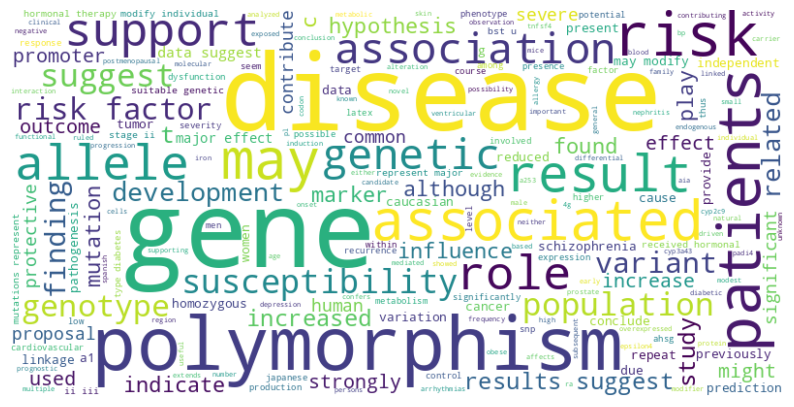

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Clean the sentences by removing specific unwanted words
unwanted_words = ["@GENE$" , "@DISEASE$","gene", "disease"]
errors['cleaned_sentence'] = errors['sentence'].apply(
    lambda x: ' '.join(word for word in x.strip().lower().split() if word not in unwanted_words)
)

# Join all cleaned sentences
text = ' '.join(errors['cleaned_sentence'])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [21]:
word_freq = wordcloud.words_

# Print word frequencies
print("Word Frequencies:")
count = 0
for word, freq in word_freq.items():
    print(f"{word}: {freq}")
    count+=1
    if count >25:
        break

Word Frequencies:
gene: 1.0
disease: 0.984251968503937
polymorphism: 0.3937007874015748
risk: 0.25196850393700787
patients: 0.2440944881889764
may: 0.2125984251968504
associated: 0.2125984251968504
result: 0.18110236220472442
allele: 0.15748031496062992
role: 0.14960629921259844
support: 0.14173228346456693
association: 0.12598425196850394
genetic: 0.12598425196850394
susceptibility: 0.12598425196850394
suggest: 0.11811023622047244
population: 0.11811023622047244
genotype: 0.11023622047244094
risk factor: 0.11023622047244094
variant: 0.10236220472440945
finding: 0.09448818897637795
development: 0.08661417322834646
related: 0.07874015748031496
t: 0.07086614173228346
study: 0.06299212598425197
increased: 0.06299212598425197
results suggest: 0.06299212598425197


In [19]:
# Step 2: Merge the DataFrames
merged_df = llama_7b_gad.merge(gemma_7b_gad, on=['sentence','actual_output'], suffixes=('_llama7b', '_gemma7b'))
# Step 2: Identify where BioBERT failed but Llama2 succeeded
merged_df['llama7b_correct'] = merged_df['predicted_output_llama7b'] == merged_df['actual_output']
merged_df['gemma7b_correct'] = merged_df['predicted_output_gemma7b'] == merged_df['actual_output']

# Filter for discrepancies: BioBERT incorrect, Llama2 correct
errors = merged_df[(merged_df['gemma7b_correct'] == False) & (merged_df['llama7b_correct'] == True)]

# Display the sentences with discrepancies
print("Discrepancies where Gemma-7b failed but Llama2 succeeded:")
errors[['sentence', 'predicted_output_llama7b', 'predicted_output_gemma7b', 'actual_output']]


Discrepancies where Gemma-7b failed but Llama2 succeeded:


,sentence,predicted_output_llama7b,predicted_output_gemma7b,actual_output
43,These data suggest that polymorphisms in the @...,True,False,True
139,A modest association between @GENE$ and @DISEA...,True,False,True
214,"In conclusion, our findings support an etiolog...",True,False,True
266,This study provides support for the hypothesis...,True,False,True
333,The results suggest that @GENE$ genetic polymo...,True,False,True
...,...,...,...,...
5329,Statistically insignificant association of @GE...,True,False,True
5349,These results indicate that the @GENE$ variant...,True,False,True
5350,@GENE$ G972R was associated with the baseline ...,True,False,True
5438,These findings provide replication of the asso...,True,False,True


/tmp/ipykernel_160844/1362880932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['cleaned_sentence'] = errors['sentence'].apply(


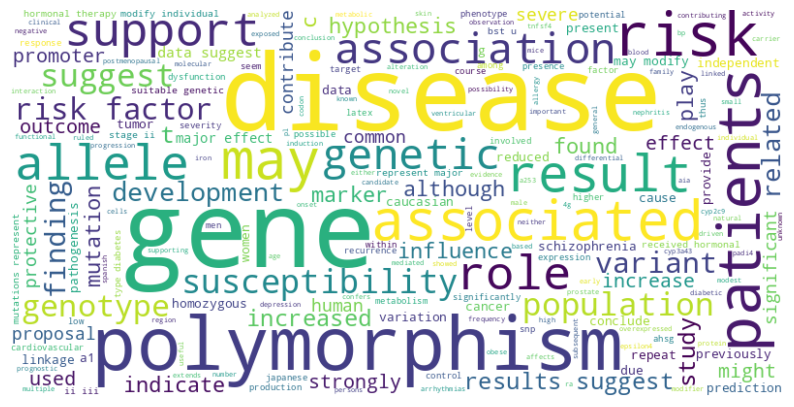

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Clean the sentences by removing specific unwanted words
unwanted_words = ["@GENE$" , "@DISEASE$","gene", "disease"]
errors['cleaned_sentence'] = errors['sentence'].apply(
    lambda x: ' '.join(word for word in x.strip().lower().split() if word not in unwanted_words)
)

# Join all cleaned sentences
text = ' '.join(errors['cleaned_sentence'])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [21]:
word_freq = wordcloud.words_

# Print word frequencies
print("Word Frequencies:")
count = 0
for word, freq in word_freq.items():
    print(f"{word}: {freq}")
    count+=1
    if count >25:
        break

Word Frequencies:
gene: 1.0
disease: 0.984251968503937
polymorphism: 0.3937007874015748
risk: 0.25196850393700787
patients: 0.2440944881889764
may: 0.2125984251968504
associated: 0.2125984251968504
result: 0.18110236220472442
allele: 0.15748031496062992
role: 0.14960629921259844
support: 0.14173228346456693
association: 0.12598425196850394
genetic: 0.12598425196850394
susceptibility: 0.12598425196850394
suggest: 0.11811023622047244
population: 0.11811023622047244
genotype: 0.11023622047244094
risk factor: 0.11023622047244094
variant: 0.10236220472440945
finding: 0.09448818897637795
development: 0.08661417322834646
related: 0.07874015748031496
t: 0.07086614173228346
study: 0.06299212598425197
increased: 0.06299212598425197
results suggest: 0.06299212598425197
